In [2]:
import pandas as pd
import folium
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import requests

matplotlib.rcParams['axes.unicode_minus'] = False # 그래프 마이너스 기호 깨질때
plt.rcParams['font.family'] ='Malgun Gothic' # 그래프 한글깨질때

In [2]:
train = pd.read_csv('train_seoul.csv')
train.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,역명2,년도,월,분기
0,20180101,1호선,서울역,40213.0,34505.0,1호선 서울역,2018,1,1
1,20180101,우이신설선,신설동역,699.0,809.0,우이신설선 신설동역,2018,1,1
2,20180101,우이신설선,보문역,754.0,803.0,우이신설선 보문역,2018,1,1
3,20180101,우이신설선,성신여대입구역,2228.0,2276.0,우이신설선 성신여대입구역,2018,1,1
4,20180101,우이신설선,정릉역,1844.0,1685.0,우이신설선 정릉역,2018,1,1


In [5]:
train_grouped = train.groupby(['역명2'])[['승차총승객수','하차총승객수']].mean().round(0).astype(int).reset_index()
train_grouped.head()

,역명2,승차총승객수,하차총승객수
0,1호선 가산디지털단지역,14691,17289
1,1호선 구로역,17670,18136
2,1호선 금천구청역,10805,10630
3,1호선 남영역,9219,9733
4,1호선 노량진역,9879,9469


In [6]:
juso = pd.read_csv('지하철역명_최종.csv')
juso.head()

,호선,역명,위도,경도,행정동코드,행정동_카카오,역명2,구
0,1,서울역,37.553150,126.972533,11140540,회현동,1호선 서울역,중구
1,1,시청역,37.563590,126.975407,11020520,소공동,1호선 시청역,중구
2,1,종각역,37.570203,126.983116,11110615,"종로1,2,3,4가동",1호선 종각역,종로구
3,1,종로3가역,37.570429,126.992095,11110615,"종로1,2,3,4가동",1호선 종로3가역,종로구
4,1,종로5가역,37.570971,127.001900,11110615,"종로1,2,3,4가동",1호선 종로5가역,종로구


In [7]:
juso2 = juso[['역명2','구',]]

In [8]:
train_j = pd.merge(train,juso2,on='역명2',how='left')
train_j.to_csv('train_juso.csv',index=False)

In [9]:
train_j.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,역명2,년도,월,분기,구
0,20180101,1호선,서울역,40213.0,34505.0,1호선 서울역,2018,1,1,중구
1,20180101,우이신설선,신설동역,699.0,809.0,우이신설선 신설동역,2018,1,1,NaN
2,20180101,우이신설선,보문역,754.0,803.0,우이신설선 보문역,2018,1,1,NaN
3,20180101,우이신설선,성신여대입구역,2228.0,2276.0,우이신설선 성신여대입구역,2018,1,1,NaN
4,20180101,우이신설선,정릉역,1844.0,1685.0,우이신설선 정릉역,2018,1,1,NaN


In [21]:
train_j.to_csv('train_juso.csv',index=False)

In [18]:
train = pd.read_csv('train_gu.csv')
train.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,역명2,년도,월,분기,구
0,20180101,1호선,가산디지털단지역,4886,6831,1호선 가산디지털단지역,2018,1,1,금천구
1,20180102,1호선,가산디지털단지역,17969,21222,1호선 가산디지털단지역,2018,1,1,금천구
2,20180103,1호선,가산디지털단지역,18005,21393,1호선 가산디지털단지역,2018,1,1,금천구
3,20180104,1호선,가산디지털단지역,17942,21275,1호선 가산디지털단지역,2018,1,1,금천구
4,20180105,1호선,가산디지털단지역,18543,21912,1호선 가산디지털단지역,2018,1,1,금천구


In [23]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688519 entries, 0 to 688518
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사용일자    688519 non-null  int64 
 1   노선명     688519 non-null  object
 2   역명      688519 non-null  object
 3   승차총승객수  688519 non-null  int64 
 4   하차총승객수  688519 non-null  int64 
 5   역명2     688519 non-null  object
 6   년도      688519 non-null  int64 
 7   월       688519 non-null  int64 
 8   분기      688519 non-null  int64 
 9   구       680220 non-null  object
dtypes: int64(6), object(4)
memory usage: 52.5+ MB


In [4]:
train2.dropna(axis=0,inplace=True)
train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 680220 entries, 0 to 688518
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사용일자    680220 non-null  int64 
 1   노선명     680220 non-null  object
 2   역명      680220 non-null  object
 3   승차총승객수  680220 non-null  int64 
 4   하차총승객수  680220 non-null  int64 
 5   역명2     680220 non-null  object
 6   년도      680220 non-null  int64 
 7   월       680220 non-null  int64 
 8   분기      680220 non-null  int64 
 9   구       680220 non-null  object
dtypes: int64(6), object(4)
memory usage: 57.1+ MB


In [5]:
train2['총승객수'] = train2['승차총승객수']+train2['하차총승객수']

In [6]:
train2.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,역명2,년도,월,분기,구,총승객수
0,20180101,1호선,가산디지털단지역,4886,6831,1호선 가산디지털단지역,2018,1,1,금천구,11717
1,20180102,1호선,가산디지털단지역,17969,21222,1호선 가산디지털단지역,2018,1,1,금천구,39191
2,20180103,1호선,가산디지털단지역,18005,21393,1호선 가산디지털단지역,2018,1,1,금천구,39398
3,20180104,1호선,가산디지털단지역,17942,21275,1호선 가산디지털단지역,2018,1,1,금천구,39217
4,20180105,1호선,가산디지털단지역,18543,21912,1호선 가산디지털단지역,2018,1,1,금천구,40455


In [7]:
train = train2[['년도','분기','구','역명2','승차총승객수','하차총승객수','총승객수']]

In [8]:
train['역명2'] = train['노선명']+" "+train['역명']

train['사용일자'] = train['사용일자'].astype(str)
train['년도'] = train['사용일자'].apply(lambda x : x[:4])
train['월'] = train['사용일자'].apply(lambda x : x[4:6])
train['분기'] = train['월'].apply(lambda x : '1' if ((x=='01')|(x=='02')|(x=='03')) else '2' 
                         if ((x=='04')|(x=='05')|(x=='06')) else '3' if ((x=='07')|(x=='08')|(x=='09')) else '4')

train['총승객수'] = train['승차총승객수']+train['하차총승객수']

train_grouped = train.groupby(['년도','분기','구','역명2'])[['승차총승객수','하차총승객수','총승객수']].mean().round(0).astype(int).reset_index()

train_grouped

,년도,분기,구,역명2,승차총승객수,하차총승객수,총승객수
0,2018,1,강남구,2호선 강남역,104517,105054,209571
1,2018,1,강남구,2호선 삼성역,56829,57955,114784
2,2018,1,강남구,2호선 선릉역,54000,46244,100243
3,2018,1,강남구,2호선 역삼역,46641,50979,97620
4,2018,1,강남구,3호선 대청역,9627,8652,18279
...,...,...,...,...,...,...,...
7483,2024,1,중랑구,7호선 용마산역,5489,5400,10890
7484,2024,1,중랑구,7호선 중화역,9975,9732,19707
7485,2024,1,중랑구,중앙선 망우역,7270,7071,14341
7486,2024,1,중랑구,중앙선 상봉역,5538,5439,10977


In [8]:
train_grouped2 = train_grouped.groupby('역명2')[['총승객수','승차총승객수','하차총승객수']].mean().round(0).astype(int).reset_index()
train_grouped2

,역명2,총승객수,승차총승객수,하차총승객수
0,1호선 가산디지털단지역,31981,14692,17290
1,1호선 구로역,35806,17670,18136
2,1호선 금천구청역,21436,10806,10631
3,1호선 남영역,18953,9219,9733
4,1호선 노량진역,19349,9880,9469
...,...,...,...,...
362,중앙선 이촌역,6771,3839,2932
363,중앙선 중랑역,10343,5291,5052
364,중앙선 청량리역,31851,15487,16363
365,중앙선 한남역,7641,3902,3739


In [9]:
train_grouped_i = train_grouped2.sort_values(by=['승차총승객수'],ascending=False)[:20]
train_grouped_o = train_grouped2.sort_values(by=['하차총승객수'],ascending=False)[:20]
train_grouped_t = train_grouped2.sort_values(by=['총승객수'],ascending=False)[:20]

In [10]:
train_grouped_i

,역명2,총승객수,승차총승객수,하차총승객수
20,2호선 강남역,164601,82346,82255
64,2호선 잠실역,143958,73048,70910
69,2호선 홍대입구역,132665,64173,68491
47,2호선 신림역,117524,59651,57873
24,2호선 구로디지털단지역,109765,54967,54797
36,2호선 삼성역,100810,50025,50785
46,2호선 신도림역,98451,49509,48942
73,3호선 고속터미널역,96108,48985,47123
40,2호선 선릉역,91762,48716,43046
38,2호선 서울대입구역,90762,46030,44732


In [11]:
train_grouped_o

,역명2,총승객수,승차총승객수,하차총승객수
20,2호선 강남역,164601,82346,82255
64,2호선 잠실역,143958,73048,70910
69,2호선 홍대입구역,132665,64173,68491
47,2호선 신림역,117524,59651,57873
24,2호선 구로디지털단지역,109765,54967,54797
36,2호선 삼성역,100810,50025,50785
46,2호선 신도림역,98451,49509,48942
53,2호선 역삼역,90112,42669,47443
73,3호선 고속터미널역,96108,48985,47123
38,2호선 서울대입구역,90762,46030,44732


In [12]:
train_grouped_t

,역명2,총승객수,승차총승객수,하차총승객수
20,2호선 강남역,164601,82346,82255
64,2호선 잠실역,143958,73048,70910
69,2호선 홍대입구역,132665,64173,68491
47,2호선 신림역,117524,59651,57873
24,2호선 구로디지털단지역,109765,54967,54797
36,2호선 삼성역,100810,50025,50785
46,2호선 신도림역,98451,49509,48942
73,3호선 고속터미널역,96108,48985,47123
40,2호선 선릉역,91762,48716,43046
38,2호선 서울대입구역,90762,46030,44732


### 시각화

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_19276\469315205.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='총승객수',y='역명2',data=train_grouped_t,orient='h',palette='autumn')


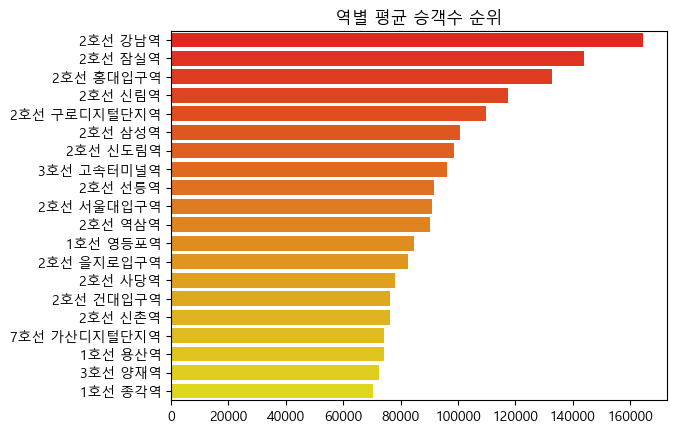

In [23]:
ax = sns.barplot(x='총승객수',y='역명2',data=train_grouped_t,orient='h',palette='autumn')
ax.set(xlabel='',ylabel='')
ax.set_title("역별 평균 승객수 순위");

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_19276\2657682091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='총승객수',y='구',data= train_gu2,orient='h',palette='autumn')


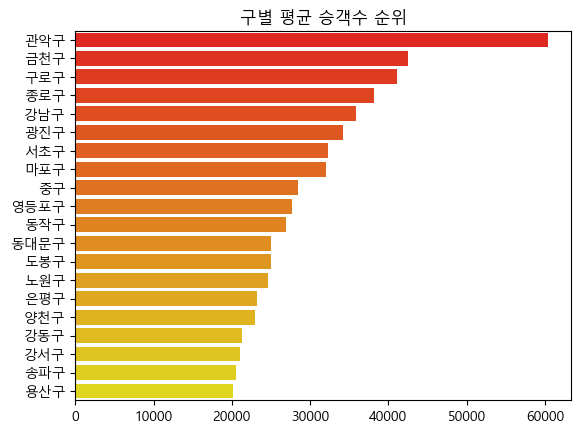

In [25]:
train_gu = train_grouped.groupby('구')[['총승객수','승차총승객수','하차총승객수']].mean().round(0).astype(int).reset_index()
train_gu2 = train_gu.sort_values(by=['총승객수'],ascending=False)[:20]
ax = sns.barplot(x='총승객수',y='구',data= train_gu2,orient='h',palette='autumn')
ax.set(xlabel='',ylabel='')
ax.set_title("구별 평균 승객수 순위");

In [10]:
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [33]:
m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=11,
    tiles='cartodbpositron' 
)
folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data = train_gu,
    columns = ['구','총승객수'],
    key_on='feature.properties.name',
    fill_color='Purples',
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)
m

In [35]:
m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=11,
    tiles='cartodbpositron' 
)
folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data = train_gu,
    columns = ['구','승차총승객수'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)
m

In [36]:
m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=11,
    tiles='cartodbpositron' 
)
folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data = train_gu,
    columns = ['구','하차총승객수'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)
m

In [2]:
df = pd.read_csv('지하철2015-2017.csv')
df1 = pd.read_csv('train_gu.csv')

In [4]:
df2 = pd.concat([df,df1],ignore_index=True)
df2

,사용일자,년도,월,분기,노선명,역명,승차총승객수,하차총승객수,총승객수,역명2,구
0,20150101,2015,1,1,2호선,낙성대역,14586,14889,29475.0,2호선 낙성대역,관악구
1,20150101,2015,1,1,2호선,사당역,19233,20298,39531.0,2호선 사당역,동작구
2,20150101,2015,1,1,2호선,방배역,5920,6065,11985.0,2호선 방배역,서초구
3,20150101,2015,1,1,2호선,서초역,4379,4120,8499.0,2호선 서초역,서초구
4,20150101,2015,1,1,분당선,선정릉역,1972,1828,3800.0,분당선 선정릉역,강남구
...,...,...,...,...,...,...,...,...,...,...,...
1194453,20221231,2022,12,4,4호선,삼각지역,3911,4864,NaN,4호선 삼각지역,용산구
1194454,20221231,2022,12,4,4호선,신용산역,11025,12099,NaN,4호선 신용산역,용산구
1194455,20221231,2022,12,4,1호선,금천구청역,7519,7426,NaN,1호선 금천구청역,금천구
1194456,20221231,2022,12,4,1호선,가산디지털단지역,5579,7299,NaN,1호선 가산디지털단지역,금천구
